# Copy over files to interHMRDistance directory

In [ ]:
cp /data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/filtRefSeqFiles/HSC.minsize50.filtforrefseqTSSexons.txt
/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/refSeqFilteredBEDs

cp /data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/filtRefSeqFiles/Macrophage.minsize50.filtforrefseqTSSexons.txt
/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/refSeqFilteredBEDs

cp /data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/filtRefSeqFiles/Tcell.minsize50.filtforrefseqTSSexons.txt
/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/refSeqFilteredBEDs

# make_observedTables.sh

In [ ]:
#bedtools closest -io -d -a ${celltype}.minsize50.filtforrefseqTSSexons.txt -b ${celltype}.minsize50.filtforrefseqTSSexons.txt | awk -v ctype="${celltype}" 'BEGIN{OFS=FS="\t"}{print $2,ctype}' > ${outDir}${celltype}.obsDistances.txt


In [ ]:


obsDir=/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/refSeqFilteredBEDs/
outDir=/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/obsDistances/

cd $obsDir

for celltype in Adrenal Bcell fSpinal fHeart H1ESC Liver
do
	bedtools closest -io -d -a ${celltype}.minsize50.filtforrefseqTSSexons.txt -b ${celltype}.minsize50.filtforrefseqTSSexons.txt | awk -v ctype="${celltype}" 'BEGIN{OFS=FS="\t"}{print $9,ctype}' > ${outDir}${celltype}.obsDistances.txt
done

cat ${outDir}*.obsDistances.txt > ${outDir}AllCTs.obsDistances.txt

# make_expectedTables.sh

In [ ]:
countDir=/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/finalCounts/
outDir=/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/finalCounts/

cd $obsDir

for celltype in Adrenal Bcell fHeart fSpinal H1ESC Liver
do
	awk -v ctype="${celltype}" 'BEGIN{OFS=FS="\t"}{print $2,ctype}' ${countDir}${celltype}.avgInterHMRDist.all.txt > ${outDir}${celltype}.expDistances.txt
done

rm ${outDir}AllCTs.expDistances.txt
cat ${outDir}*expDistances.txt > ${outDir}AllCTs.expDistances.txt


# Run shuffle - simulation - scripts

In [ ]:
#!/bin/bash
#SBATCH --nodes=1
#SBATCH --ntasks=1
#SBATCH --time=30:00:00
#SBATCH --mem=100G
#SBATCH --output=AdrinterHMR_nullRandom_Adrenal.out

dir=/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/

numIterations=10000
whiteList="ncbiRefSeqCurated_NM.promotersUp2000Down1000AndExons.txt"
HMRDir="/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/refSeqFilteredBEDs/"


cd ${dir}


######## Code to shuffle and compare closest HMR-HMR distances. Row-by-row dists and avg for a shuffle are each saved in different files. 
# I want the individual average distances, too. I think it's important to keep. 
# Adrenal
for i in $(seq 0 ${numIterations})
do
	# perform shuffle and record results
	bedtools closest -io -d -a <(bedtools shuffle -excl ${whiteList} -i ${HMRDir}Adrenal.minsize50.filtforrefseqTSSexons.txt -g ${dir}hg19.chromSizes.txt | awk 'BEGIN{FS=OFS="\t"}{print $1,$2,$3}' - | bedtools sort -i -) -b <(bedtools shuffle -excl ${whiteList} -i ${HMRDir}Adrenal.minsize50.filtforrefseqTSSexons.txt -g ${dir}hg19.chromSizes.txt | awk 'BEGIN{FS=OFS="\t"}{print $1,$2,$3}' - | bedtools sort -i -) | awk 'BEGIN{OFS=FS="\t"}{print $7}' > ${dir}tablesWithIndivDists/Adrenal.shuffle.${i}.txt
	# calculate the average distance for this shuffle run and save
	awk 'BEGIN{OFS=FS="\t";i=0}{i=(i+$1)}END{print i,(i/NR)}' ${dir}tablesWithIndivDists/Adrenal.shuffle.${i}.txt > ${dir}temps/Adrenal.avgInterHMRDist.${i}.temp.txt
done
# summarize shuffle results and store as an output file
cat ${dir}temps/Adrenal.avgInterHMRDist.*.temp.txt > ${dir}finalCounts/Adrenal.avgInterHMRDist.all.txt




In [ ]:
#!/bin/bash
#SBATCH --nodes=1
#SBATCH --ntasks=1
#SBATCH --time=30:00:00
#SBATCH --mem=100G
#SBATCH --output=interHMR_nullRandom_Bcell.out

dir=/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/

numIterations=10000
whiteList="ncbiRefSeqCurated_NM.promotersUp2000Down1000AndExons.txt"
HMRDir="/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/refSeqFilteredBEDs/"

cd ${dir}

######## Code to shuffle and compare closest HMR-HMR distances. Row-by-row dists and avg for a shuffle are each saved in different files. 
# I want the individual average distances, too. I think it's important to keep. 
# Bcell
for i in $(seq 0 ${numIterations})
do
	# perform shuffle and record results
	bedtools closest -io -d -a <(bedtools shuffle -excl ${whiteList} -i ${HMRDir}Bcell.minsize50.filtforrefseqTSSexons.txt -g ${dir}hg19.chromSizes.txt | awk 'BEGIN{FS=OFS="\t"}{print $1,$2,$3}' - | bedtools sort -i -) -b <(bedtools shuffle -excl ${whiteList} -i ${HMRDir}Bcell.minsize50.filtforrefseqTSSexons.txt -g ${dir}hg19.chromSizes.txt | awk 'BEGIN{FS=OFS="\t"}{print $1,$2,$3}' - | bedtools sort -i -) | awk 'BEGIN{OFS=FS="\t"}{print $7}' > ${dir}tablesWithIndivDists/Bcell.shuffle.${i}.txt
	# calculate the average distance for this shuffle run and save
	awk 'BEGIN{OFS=FS="\t";i=0}{i=(i+$1)}END{print i,(i/NR)}' ${dir}tablesWithIndivDists/Bcell.shuffle.${i}.txt > ${dir}temps/Bcell.avgInterHMRDist.${i}.temp.txt
done
# summarize shuffle results and store as an output file
cat ${dir}temps/Bcell.avgInterHMRDist.*.temp.txt > ${dir}finalCounts/Bcell.avgInterHMRDist.all.txt




In [ ]:
#!/bin/bash
#SBATCH --nodes=1
#SBATCH --ntasks=1
#SBATCH --time=30:00:00
#SBATCH --mem=100G
#SBATCH --output=FheinterHMR_nullRandom_fHeart.out

dir=/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/

numIterations=10000
whiteList="ncbiRefSeqCurated_NM.promotersUp2000Down1000AndExons.txt"
HMRDir="/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/refSeqFilteredBEDs/"

cd ${dir}

######## Code to shuffle and compare closest HMR-HMR distances. Row-by-row dists and avg for a shuffle are each saved in different files. 
# I want the individual average distances, too. I think it's important to keep. 
# fHeart
for i in $(seq 0 ${numIterations})
do
	# perform shuffle and record results
	bedtools closest -io -d -a <(bedtools shuffle -excl ${whiteList} -i ${HMRDir}fHeart.minsize50.filtforrefseqTSSexons.txt -g ${dir}hg19.chromSizes.txt | awk 'BEGIN{FS=OFS="\t"}{print $1,$2,$3}' - | bedtools sort -i -) -b <(bedtools shuffle -excl ${whiteList} -i ${HMRDir}fHeart.minsize50.filtforrefseqTSSexons.txt -g ${dir}hg19.chromSizes.txt | awk 'BEGIN{FS=OFS="\t"}{print $1,$2,$3}' - | bedtools sort -i -) | awk 'BEGIN{OFS=FS="\t"}{print $7}' > ${dir}tablesWithIndivDists/fHeart.shuffle.${i}.txt
	# calculate the average distance for this shuffle run and save
	awk 'BEGIN{OFS=FS="\t";i=0}{i=(i+$1)}END{print i,(i/NR)}' ${dir}tablesWithIndivDists/fHeart.shuffle.${i}.txt > ${dir}temps/fHeart.avgInterHMRDist.${i}.temp.txt
done
# summarize shuffle results and store as an output file
cat ${dir}temps/fHeart.avgInterHMRDist.*.temp.txt > ${dir}finalCounts/fHeart.avgInterHMRDist.all.txt




In [ ]:
#!/bin/bash
#SBATCH --nodes=1
#SBATCH --ntasks=1
#SBATCH --time=30:00:00
#SBATCH --mem=100G
#SBATCH --output=fSpinterHMR_nullRandom_fSpinal.out

dir=/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/

numIterations=10000
whiteList="ncbiRefSeqCurated_NM.promotersUp2000Down1000AndExons.txt"
HMRDir="/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/refSeqFilteredBEDs/"


cd ${dir}

######## Code to shuffle and compare closest HMR-HMR distances. Row-by-row dists and avg for a shuffle are each saved in different files. 
# I want the individual average distances, too. I think it's important to keep. 
# fSpinal
for i in $(seq 0 ${numIterations})
do
	# perform shuffle and record results
	bedtools closest -io -d -a <(bedtools shuffle -excl ${whiteList} -i ${HMRDir}fSpinal.minsize50.filtforrefseqTSSexons.txt -g ${dir}hg19.chromSizes.txt | awk 'BEGIN{FS=OFS="\t"}{print $1,$2,$3}' - | bedtools sort -i -) -b <(bedtools shuffle -excl ${whiteList} -i ${HMRDir}fSpinal.minsize50.filtforrefseqTSSexons.txt -g ${dir}hg19.chromSizes.txt | awk 'BEGIN{FS=OFS="\t"}{print $1,$2,$3}' - | bedtools sort -i -) | awk 'BEGIN{OFS=FS="\t"}{print $7}' > ${dir}tablesWithIndivDists/fSpinal.shuffle.${i}.txt
	# calculate the average distance for this shuffle run and save
	awk 'BEGIN{OFS=FS="\t";i=0}{i=(i+$1)}END{print i,(i/NR)}' ${dir}tablesWithIndivDists/fSpinal.shuffle.${i}.txt > ${dir}temps/fSpinal.avgInterHMRDist.${i}.temp.txt
done
# summarize shuffle results and store as an output file
cat ${dir}temps/fSpinal.avgInterHMRDist.*.temp.txt > ${dir}finalCounts/fSpinal.avgInterHMRDist.all.txt




In [ ]:
#!/bin/bash
#SBATCH --nodes=1
#SBATCH --ntasks=1
#SBATCH --time=30:00:00
#SBATCH --mem=100G
#SBATCH --output=ESCinterHMR_nullRandom_H1ESC.out

dir=/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/

numIterations=10000
whiteList="ncbiRefSeqCurated_NM.promotersUp2000Down1000AndExons.txt"
HMRDir="/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/refSeqFilteredBEDs/"

cd ${dir}

######## Code to shuffle and compare closest HMR-HMR distances. Row-by-row dists and avg for a shuffle are each saved in different files. 
# I want the individual average distances, too. I think it's important to keep. 
# H1ESC
for i in $(seq 0 ${numIterations})
do
	# perform shuffle and record results
	bedtools closest -io -d -a <(bedtools shuffle -excl ${whiteList} -i ${HMRDir}H1ESC.minsize50.filtforrefseqTSSexons.txt -g ${dir}hg19.chromSizes.txt | awk 'BEGIN{FS=OFS="\t"}{print $1,$2,$3}' - | bedtools sort -i -) -b <(bedtools shuffle -excl ${whiteList} -i ${HMRDir}H1ESC.minsize50.filtforrefseqTSSexons.txt -g ${dir}hg19.chromSizes.txt | awk 'BEGIN{FS=OFS="\t"}{print $1,$2,$3}' - | bedtools sort -i -) | awk 'BEGIN{OFS=FS="\t"}{print $7}' > ${dir}tablesWithIndivDists/H1ESC.shuffle.${i}.txt
	# calculate the average distance for this shuffle run and save
	awk 'BEGIN{OFS=FS="\t";i=0}{i=(i+$1)}END{print i,(i/NR)}' ${dir}tablesWithIndivDists/H1ESC.shuffle.${i}.txt > ${dir}temps/H1ESC.avgInterHMRDist.${i}.temp.txt
done
# summarize shuffle results and store as an output file
cat ${dir}temps/H1ESC.avgInterHMRDist.*.temp.txt > ${dir}finalCounts/H1ESC.avgInterHMRDist.all.txt




In [ ]:
#!/bin/bash
#SBATCH --nodes=1
#SBATCH --ntasks=1
#SBATCH --time=30:00:00
#SBATCH --mem=100G
#SBATCH --output=LivinterHMR_nullRandom_Liver.out

dir=/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/

numIterations=10000
whiteList="ncbiRefSeqCurated_NM.promotersUp2000Down1000AndExons.txt"
HMRDir="/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/refSeqFilteredBEDs/"

cd ${dir}

######## Code to shuffle and compare closest HMR-HMR distances. Row-by-row dists and avg for a shuffle are each saved in different files. 
# I want the individual average distances, too. I think it's important to keep. 
# Liver
for i in $(seq 0 ${numIterations})
do
	# perform shuffle and record results
	bedtools closest -io -d -a <(bedtools shuffle -excl ${whiteList} -i ${HMRDir}Liver.minsize50.filtforrefseqTSSexons.txt -g ${dir}hg19.chromSizes.txt | awk 'BEGIN{FS=OFS="\t"}{print $1,$2,$3}' - | bedtools sort -i -) -b <(bedtools shuffle -excl ${whiteList} -i ${HMRDir}Liver.minsize50.filtforrefseqTSSexons.txt -g ${dir}hg19.chromSizes.txt | awk 'BEGIN{FS=OFS="\t"}{print $1,$2,$3}' - | bedtools sort -i -) | awk 'BEGIN{OFS=FS="\t"}{print $7}' > ${dir}tablesWithIndivDists/Liver.shuffle.${i}.txt
	# calculate the average distance for this shuffle run and save
	awk 'BEGIN{OFS=FS="\t";i=0}{i=(i+$1)}END{print i,(i/NR)}' ${dir}tablesWithIndivDists/Liver.shuffle.${i}.txt > ${dir}temps/Liver.avgInterHMRDist.${i}.temp.txt
done
# summarize shuffle results and store as an output file
cat ${dir}temps/Liver.avgInterHMRDist.*.temp.txt > ${dir}finalCounts/Liver.avgInterHMRDist.all.txt




# Run shuffle - simulation - scripts (Cont.)

In [ ]:
cd /data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/runScripts

sbatch run_interHMRDists_HSPC.slrm
sbatch run_interHMRDists_Macrophage.slrm

sbatch /data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/runScripts/run_interHMRDists_Neutrophhil.slrm
sbatch run_interHMRDists_Tcell.slrm

## HSPC

In [ ]:
#!/bin/bash
#SBATCH --nodes=1
#SBATCH --ntasks=1
#SBATCH --time=30:00:00
#SBATCH --mem=100G
#SBATCH --output=interHMR_nullRandom_HSPC.out

dir=/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/

numIterations=10000
whiteList="ncbiRefSeqCurated_NM.promotersUp2000Down1000AndExons.txt"
HMRDir="/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/refSeqFilteredBEDs/"

cd ${dir}

######## Code to shuffle and compare closest HMR-HMR distances. Row-by-row dists and avg for a shuffle are each saved in different files. 
# I want the individual average distances, too. I think it's important to keep. 
# HSPC
for i in $(seq 0 ${numIterations})
do
	# perform shuffle and record results
    # shuffle once
	bedtools shuffle -excl ${whiteList} -i ${HMRDir}HSC.minsize50.filtforrefseqTSSexons.txt -g ${dir}hg19.chromSizes.txt | awk 'BEGIN{FS=OFS="\t"}{print $1,$2,$3}' - | bedtools sort -i - > ${dir}temps/HSPC.shuffle_tmp1.txt
    # shuffle again
	bedtools shuffle -excl ${whiteList} -i ${HMRDir}HSC.minsize50.filtforrefseqTSSexons.txt -g ${dir}hg19.chromSizes.txt | awk 'BEGIN{FS=OFS="\t"}{print $1,$2,$3}' - | bedtools sort -i - > ${dir}temps/HSPC.shuffle_tmp2.txt
    # calculate distances
	bedtools closest -io -d -a ${dir}temps/HSPC.shuffle_tmp1.txt -b ${dir}temps/HSPC.shuffle_tmp2.txt | awk 'BEGIN{OFS=FS="\t"}{print $7}' > ${dir}tablesWithIndivDists/HSPC.shuffle.${i}.txt
	# calculate the average distance for this shuffle run and save
	awk 'BEGIN{OFS=FS="\t";i=0}{i=(i+$1)}END{print i,(i/NR)}' ${dir}tablesWithIndivDists/HSPC.shuffle.${i}.txt > ${dir}temps/HSPC.avgInterHMRDist.${i}.temp.txt
done
# summarize shuffle results and store as an output file
cat ${dir}temps/HSPC.avgInterHMRDist.*.temp.txt > ${dir}finalCounts/HSPC.avgInterHMRDist.all.txt


## Macrophage

In [ ]:
#!/bin/bash
#SBATCH --nodes=1
#SBATCH --ntasks=1
#SBATCH --time=30:00:00
#SBATCH --mem=100G
#SBATCH --output=interHMR_nullRandom_Macrophage.out

dir=/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/

numIterations=10000
whiteList="ncbiRefSeqCurated_NM.promotersUp2000Down1000AndExons.txt"
HMRDir="/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/refSeqFilteredBEDs/"

cd ${dir}

######## Code to shuffle and compare closest HMR-HMR distances. Row-by-row dists and avg for a shuffle are each saved in different files. 
# I want the individual average distances, too. I think it's important to keep. 
# Macrophage
for i in $(seq 0 ${numIterations})
do
	# perform shuffle and record results
    # shuffle once
	bedtools shuffle -excl ${whiteList} -i ${HMRDir}Macrophage.minsize50.filtforrefseqTSSexons.txt -g ${dir}hg19.chromSizes.txt | awk 'BEGIN{FS=OFS="\t"}{print $1,$2,$3}' - | bedtools sort -i - > ${dir}temps/Macrophage.shuffle_tmp1.txt
    # shuffle again
	bedtools shuffle -excl ${whiteList} -i ${HMRDir}Macrophage.minsize50.filtforrefseqTSSexons.txt -g ${dir}hg19.chromSizes.txt | awk 'BEGIN{FS=OFS="\t"}{print $1,$2,$3}' - | bedtools sort -i - > ${dir}temps/Macrophage.shuffle_tmp2.txt
    # calculate distances
	bedtools closest -io -d -a ${dir}temps/Macrophage.shuffle_tmp1.txt -b ${dir}temps/Macrophage.shuffle_tmp2.txt | awk 'BEGIN{OFS=FS="\t"}{print $7}' > ${dir}tablesWithIndivDists/Macrophage.shuffle.${i}.txt
	# calculate the average distance for this shuffle run and save
	awk 'BEGIN{OFS=FS="\t";i=0}{i=(i+$1)}END{print i,(i/NR)}' ${dir}tablesWithIndivDists/Macrophage.shuffle.${i}.txt > ${dir}temps/Macrophage.avgInterHMRDist.${i}.temp.txt
done
# summarize shuffle results and store as an output file
cat ${dir}temps/Macrophage.avgInterHMRDist.*.temp.txt > ${dir}finalCounts/Macrophage.avgInterHMRDist.all.txt


## Neutrophil

In [ ]:
/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/runScripts/run_interHMRDists_Neutrophhil.slrm

In [ ]:
#!/bin/bash
#SBATCH --nodes=2
#SBATCH --ntasks=2
#SBATCH --time=30:00:00
#SBATCH --mem=100G
#SBATCH --output=interHMR_nullRandom_Neutrophil.out

dir=/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/

numIterations=10000
whiteList="ncbiRefSeqCurated_NM.promotersUp2000Down1000AndExons.txt"
HMRDir="/data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/filtRefSeqFiles/"

cd ${dir}

######## Code to shuffle and compare closest HMR-HMR distances. Row-by-row dists and avg for a shuffle are each saved in different files. 
# I want the individual average distances, too. I think it's important to keep. 
# Neutrophil
for i in $(seq 0 ${numIterations})
do
	# perform shuffle and record results
    # shuffle once
	bedtools shuffle -excl ${whiteList} -i ${HMRDir}Neutrophil.minsize50.filtforrefseqTSSexons.txt -g ${dir}hg19.chromSizes.txt | awk 'BEGIN{FS=OFS="\t"}{print $1,$2,$3}' - | bedtools sort -i - > ${dir}temps/Neutrophil.shuffle_tmp1.Jul15.txt
    # shuffle again
	bedtools shuffle -excl ${whiteList} -i ${HMRDir}Neutrophil.minsize50.filtforrefseqTSSexons.txt -g ${dir}hg19.chromSizes.txt | awk 'BEGIN{FS=OFS="\t"}{print $1,$2,$3}' - | bedtools sort -i - > ${dir}temps/Neutrophil.shuffle_tmp2.Jul15.txt
    # calculate distances
	bedtools closest -io -d -a ${dir}temps/Neutrophil.shuffle_tmp1.Jul15.txt -b ${dir}temps/Neutrophil.shuffle_tmp2.Jul15.txt | awk 'BEGIN{OFS=FS="\t"}{print $7}' > ${dir}tablesWithIndivDists/Neutrophil.shuffle.${i}.Jul15.txt
	# calculate the average distance for this shuffle run and save
	awk 'BEGIN{OFS=FS="\t";i=0}{i=(i+$1)}END{print i,(i/NR)}' ${dir}tablesWithIndivDists/Neutrophil.shuffle.${i}.Jul15.txt > ${dir}temps/Neutrophil.avgInterHMRDist.${i}.temp.Jul15.txt
done
# summarize shuffle results and store as an output file
cat ${dir}temps/Neutrophil.avgInterHMRDist.*.temp.Jul15.txt > ${dir}finalCounts/Neutrophil.avgInterHMRDist.all.Jul15.txt


## T cell 

In [ ]:
#!/bin/bash
#SBATCH --nodes=1
#SBATCH --ntasks=1
#SBATCH --time=30:00:00
#SBATCH --mem=100G
#SBATCH --output=interHMR_nullRandom_Tcell.out

dir=/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/

numIterations=10000
whiteList="ncbiRefSeqCurated_NM.promotersUp2000Down1000AndExons.txt"
HMRDir="/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/refSeqFilteredBEDs/"

cd ${dir}

######## Code to shuffle and compare closest HMR-HMR distances. Row-by-row dists and avg for a shuffle are each saved in different files. 
# I want the individual average distances, too. I think it's important to keep. 
# Tcell
for i in $(seq 0 ${numIterations})
do
	# perform shuffle and record results
    # shuffle once
	bedtools shuffle -excl ${whiteList} -i ${HMRDir}Tcell.minsize50.filtforrefseqTSSexons.txt -g ${dir}hg19.chromSizes.txt | awk 'BEGIN{FS=OFS="\t"}{print $1,$2,$3}' - | bedtools sort -i - > ${dir}temps/Tcell.shuffle_tmp1.txt
    # shuffle again
	bedtools shuffle -excl ${whiteList} -i ${HMRDir}Tcell.minsize50.filtforrefseqTSSexons.txt -g ${dir}hg19.chromSizes.txt | awk 'BEGIN{FS=OFS="\t"}{print $1,$2,$3}' - | bedtools sort -i - > ${dir}temps/Tcell.shuffle_tmp2.txt
    # calculate distances
	bedtools closest -io -d -a ${dir}temps/Tcell.shuffle_tmp1.txt -b ${dir}temps/Tcell.shuffle_tmp2.txt | awk 'BEGIN{OFS=FS="\t"}{print $7}' > ${dir}tablesWithIndivDists/Tcell.shuffle.${i}.txt
	# calculate the average distance for this shuffle run and save
	awk 'BEGIN{OFS=FS="\t";i=0}{i=(i+$1)}END{print i,(i/NR)}' ${dir}tablesWithIndivDists/Tcell.shuffle.${i}.txt > ${dir}temps/Tcell.avgInterHMRDist.${i}.temp.txt
done
# summarize shuffle results and store as an output file
cat ${dir}temps/Tcell.avgInterHMRDist.*.temp.txt > ${dir}finalCounts/Tcell.avgInterHMRDist.all.txt


# Summarize the shuffle results

In [1]:
countDir=/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/finalCounts/
outDir=/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/finalCounts/

cd $outDir

In [2]:
# Iterate over celltypes
for celltype in Neutrophil
do
	awk -v ctype="${celltype}" 'BEGIN{OFS=FS="\t"}{print $2,ctype}' ${countDir}${celltype}.avgInterHMRDist.all.Jul15.txt > ${outDir}${celltype}.expDistances.txt
done

rm ${outDir}AllCTs.expDistances.txt
cat ${outDir}*expDistances.txt > ${outDir}AllCTs.expDistances.Jul15.txt


In [3]:
wc -l ${outDir}AllCTs.expDistances.Jul15.txt

100010 /data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/finalCounts/AllCTs.expDistances.Jul15.txt


In [4]:
wc -l Neutrophil.expDistances.txt

10001 Neutrophil.expDistances.txt


In [4]:
head Neutrophil.expDistances.txt

31440.9	Neutrophil
32277.6	Neutrophil
32131.6	Neutrophil
31903.1	Neutrophil
32457.8	Neutrophil
31998.7	Neutrophil
31982.8	Neutrophil
31692.8	Neutrophil
31927.6	Neutrophil
31843.3	Neutrophil


In [4]:
# Iterate over celltypes
for celltype in HSPC Macrophage Tcell 
do
	awk -v ctype="${celltype}" 'BEGIN{OFS=FS="\t"}{print $2,ctype}' ${countDir}${celltype}.avgInterHMRDist.all.txt > ${outDir}${celltype}.expDistances.txt
done

rm ${outDir}AllCTs.expDistances.txt
cat ${outDir}*expDistances.txt > ${outDir}AllCTs.expDistances.txt


In [5]:
ls -lhtr | tail

-rw-r--r-- 1 scottt7 hodges_lab 155K Apr 19  2021 fSpinal.expDistances.txt
-rw-r--r-- 1 scottt7 hodges_lab 135K Apr 19  2021 H1ESC.expDistances.txt
-rw-r--r-- 1 scottt7 hodges_lab 135K Apr 19  2021 Liver.expDistances.txt
-rw-r--r-- 1 scottt7 hodges_lab 184K Jun 23 23:10 Tcell.avgInterHMRDist.all.txt
-rw-r--r-- 1 scottt7 hodges_lab 184K Jun 23 23:13 HSPC.avgInterHMRDist.all.txt
-rw-r--r-- 1 scottt7 hodges_lab 184K Jun 24 01:00 Macrophage.avgInterHMRDist.all.txt
-rw-r--r-- 1 scottt7 hodges_lab 126K Jun 25 13:53 HSPC.expDistances.txt
-rw-r--r-- 1 scottt7 hodges_lab 184K Jun 25 13:53 Macrophage.expDistances.txt
-rw-r--r-- 1 scottt7 hodges_lab 135K Jun 25 13:53 Tcell.expDistances.txt
-rw-r--r-- 1 scottt7 hodges_lab 1.3M Jun 25 13:53 AllCTs.expDistances.txt


In [6]:
head HSPC.expDistances.txt
head Macrophage.expDistances.txt

34463.2	HSPC
33972.6	HSPC
34139.8	HSPC
33724.7	HSPC
33992.1	HSPC
33772.5	HSPC
33960.9	HSPC
33696.8	HSPC
33742.5	HSPC
34090.4	HSPC
29173.7	Macrophage
28841.3	Macrophage
28819.2	Macrophage
28736.3	Macrophage
28736	Macrophage
28778.9	Macrophage
28967.4	Macrophage
28607.4	Macrophage
28724.7	Macrophage
28916.7	Macrophage


# Calculate and summarize the observed results

In [1]:
HMR_Dir=/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/refSeqFilteredBEDs/
outDir_original=/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/obsDistances/
OUT_DIR=/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/obsDistances_reperformedJun252023/
mkdir -p $OUT_DIR

cd $HMR_Dir

for CELLTYPE in Adrenal Bcell fSpinal fHeart H1ESC Liver Macrophage Tcell 
do
bedtools closest -io -d -a ${CELLTYPE}.minsize50.filtforrefseqTSSexons.txt -b ${CELLTYPE}.minsize50.filtforrefseqTSSexons.txt | awk -v ctype="${CELLTYPE}" 'BEGIN{OFS=FS="\t"}{print $9,ctype}' > ${OUT_DIR}${CELLTYPE}.obsDistances.txt
done

for CELLTYPE in HSC
do
bedtools closest -io -d -a ${CELLTYPE}.minsize50.filtforrefseqTSSexons.txt -b ${CELLTYPE}.minsize50.filtforrefseqTSSexons.txt | awk -v ctype="HSPC" 'BEGIN{OFS=FS="\t"}{print $9,ctype}' > ${OUT_DIR}HSPC.obsDistances.txt
done

cat ${OUT_DIR}*.obsDistances.txt > ${OUT_DIR}AllCTs.obsDistances.txt

In [7]:
HMR_Dir=/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/refSeqFilteredBEDs/
outDir_original=/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/obsDistances/
OUT_DIR=/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/obsDistances_reperformedJun252023/
mkdir -p $OUT_DIR

cd $HMR_Dir

for CELLTYPE in Neutrophil
do
bedtools closest -io -d -a /data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/filtRefSeqFiles/${CELLTYPE}.minsize50.filtforrefseqTSSexons.txt -b /data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/filtRefSeqFiles/${CELLTYPE}.minsize50.filtforrefseqTSSexons.txt | awk -v ctype="${CELLTYPE}" 'BEGIN{OFS=FS="\t"}{print $9,ctype}' > ${OUT_DIR}${CELLTYPE}.obsDistances.txt
done


In [ ]:
# Make a combined file that includes NEUTROPHIL
cat H1ESC.obsDistances.txt fSpinal.obsDistances.txt fHeart.obsDistances.txt Adrenal.obsDistances.txt Liver.obsDistances.txt HSPC.obsDistances.txt Macrophage.obsDistances.txt Neutrophil.obsDistances.txt Bcell.obsDistances.txt Tcell.obsDistances.txt > ${OUT_DIR}AllCTs.obsDistances.Jul15.txt

In [9]:
wc -l /data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/filtRefSeqFiles/${CELLTYPE}.minsize50.filtforrefseqTSSexons.txt

49103 /data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/filtRefSeqFiles/Neutrophil.minsize50.filtforrefseqTSSexons.txt


In [8]:
wc -l ${OUT_DIR}AllCTs.obsDistances.Jul15.txt

744458 /data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/obsDistances_reperformedJun252023/AllCTs.obsDistances.Jul15.txt


# Plot

In [3]:
library("rstatix")

In [4]:
library("ggplot2")
library("tidyverse")
library("broom")

# Set working directory 
setwd("/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances/")
list.files()


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   1.0.1     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks rstatix::filter(), stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "Adrenal.minsize50.filtforrefseqTSSexons.txt"                   
 [2] "Bcell.minsize50.filtforrefseqTSSexons.txt"                     
 [3] "fHeart.minsize50.filtforrefseqTSSexons.txt"                    
 [4] "finalCounts"                                                   
 [5] "fSpinal.minsize50.filtforrefseqTSSexons.txt"                   
 [6] "graph_interHMRDists.R"                                         
 [7] "H1ESC.minsize50.filtforrefseqTSSexons.txt"                     
 [8] "hg19.chromSizes.txt"                                           
 [9] "interHMR_nullRandom_Neutrophil.out"                            
[10] "interHMRDistances.9celltypes.June252023.AllDistUnder150000.pdf"
[11] "interHMRDistances.9celltypes.June252023.AllDistUnder500000.pdf"
[12] "Liver.minsize50.filtforrefseqTSSexons.txt"                     
[13] "ncbiRefSeqCurated_NM.promotersUp2000Down1000AndExons.txt"      
[14] "obsDistances"                                                  
[15] "obsDistances_reperformedJun252023"                             
[16] "refSeqFilteredBEDs"                                            
[17] "run_interHMRDists_Neutrophhil.slrm"                            
[18] "run_Neut_Jul15.slrm"                                           
[19] "runScripts"                                                    
[20] "startingBEDs"                                                  
[21] "tablesWithIndivDists"                                          
[22] "temps"

## Load in data 

In [19]:
# Load in table of "simulated" shuffled values
AllObsDist <- read_tsv("./obsDistances_reperformedJun252023/AllCTs.obsDistances.Jul15.txt", col_names=c("Distance","Celltype")) %>%
  mutate(Group="Observed")


b <- AllObsDist %>%
  dplyr::filter(Distance<50000)
AllObsDistUnder150000 <- AllObsDist %>%
  dplyr::filter(Distance<150000)
AllObsDistUnder500000 <- AllObsDist %>%
  dplyr::filter(Distance<500000)
AllObsDistUnder1000000 <- AllObsDist %>%
  dplyr::filter(Distance<1000000)


Rows: 396781 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Celltype
dbl (1): Distance

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [20]:
unique(AllObsDistUnder50000$Celltype)

[1] "Adrenal"    "Bcell"      "fHeart"     "fSpinal"    "H1ESC"     
 [6] "HSPC"       "Liver"      "Macrophage" "Tcell"      "Neutrophil"

In [21]:
# Load expected values table 
AllExpDist <- read_tsv("./finalCounts/AllCTs.expDistances.Jul15.txt", col_names=c("Distance","Celltype")) %>%
  mutate(Group="Expected")


Rows: 100010 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Celltype
dbl (1): Distance

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Try to factor for ordering

In [22]:
# Combine and filter by length (length max affects the density resolution in plottinng)
AllDist <- rbind(AllObsDist,AllExpDist)
AllDistUnder150000 <- rbind(AllObsDistUnder150000,AllExpDist)
AllDistUnder500000 <- rbind(AllObsDistUnder500000,AllExpDist)
AllDistUnder1000000 <- rbind(AllObsDistUnder1000000,AllExpDist)

AllDist$Celltype <- factor(AllDist$Celltype, levels=c("H1ESC","fSpinal","fHeart","Adrenal","Liver","HSPC","Macrophage","Neutrophil","Bcell","Tcell"))


AllDistUnder150000$Celltype <- factor(AllDistUnder150000$Celltype, levels=c("H1ESC","fSpinal","fHeart","Adrenal","Liver","HSPC","Macrophage","Neutrophil","Bcell","Tcell"))
AllDistUnder500000$Celltype <- factor(AllDistUnder500000$Celltype, levels=c("H1ESC","fSpinal","fHeart","Adrenal","Liver","HSPC","Macrophage","Neutrophil","Bcell","Tcell"))
AllDistUnder1000000$Celltype <- factor(AllDistUnder1000000$Celltype, levels=c("H1ESC","fSpinal","fHeart","Adrenal","Liver","HSPC","Macrophage","Neutrophil","Bcell","Tcell"))

print("Done.")

[1] "Done."


In [23]:
AllDistUnder500000

Distance,Celltype,Group
<dbl>,<fct>,<chr>
144,H1ESC,Observed
144,H1ESC,Observed
99,H1ESC,Observed
99,H1ESC,Observed
135,H1ESC,Observed
135,H1ESC,Observed
174,H1ESC,Observed
9427,H1ESC,Observed
9427,H1ESC,Observed


In [24]:
AllDistUnder500000 %>% filter(Group=="Observed") %>% select(Celltype) %>% unique()

Celltype
<fct>
H1ESC
fSpinal
fHeart
Adrenal
Liver
HSPC
Macrophage
Neutrophil
Bcell


## Stats

In [25]:
AllDistUnder500000

Distance,Celltype,Group
<dbl>,<fct>,<chr>
144,H1ESC,Observed
144,H1ESC,Observed
99,H1ESC,Observed
99,H1ESC,Observed
135,H1ESC,Observed
135,H1ESC,Observed
174,H1ESC,Observed
9427,H1ESC,Observed
9427,H1ESC,Observed


EXP vs OBS for each Cell type

In [26]:
AllDistUnder500000 %>%
  nest(data = c(-Celltype)) %>%
  mutate(data = map(data, ~ wilcox.test(Distance ~ Group, data = .x)),
         data = map(data, tidy)) %>% 
  unnest(data)

Celltype,statistic,p.value,method,alternative
<fct>,<dbl>,<dbl>,<chr>,<chr>
H1ESC,143367414,0,Wilcoxon rank sum test with continuity correction,two.sided
fSpinal,359719779,0,Wilcoxon rank sum test with continuity correction,two.sided
fHeart,351610130,0,Wilcoxon rank sum test with continuity correction,two.sided
Adrenal,292072010,0,Wilcoxon rank sum test with continuity correction,two.sided
Liver,300094006,0,Wilcoxon rank sum test with continuity correction,two.sided
HSPC,369864714,0,Wilcoxon rank sum test with continuity correction,two.sided
Macrophage,445083206,0,Wilcoxon rank sum test with continuity correction,two.sided
Neutrophil,402499500,0,Wilcoxon rank sum test with continuity correction,two.sided
Bcell,281841108,0,Wilcoxon rank sum test with continuity correction,two.sided


Adam's method

In [27]:
stat.test <- AllDistUnder500000 %>%
  group_by(Celltype) %>%
  wilcox_test(Distance ~ Group) %>%
  adjust_pvalue(method = "fdr") %>%
  add_significance("p.adj")

stat.test

Celltype,.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif
<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
H1ESC,Distance,Expected,Observed,10001,17907,143367414,0,0,****
fSpinal,Distance,Expected,Observed,10001,44209,359719779,0,0,****
fHeart,Distance,Expected,Observed,10001,43314,351610130,0,0,****
Adrenal,Distance,Expected,Observed,10001,36426,292072010,0,0,****
Liver,Distance,Expected,Observed,10001,38025,300094006,0,0,****
HSPC,Distance,Expected,Observed,10001,45939,369864714,0,0,****
Macrophage,Distance,Expected,Observed,10001,54209,445083206,0,0,****
Neutrophil,Distance,Expected,Observed,10001,48963,402499500,0,0,****
Bcell,Distance,Expected,Observed,10001,33861,281841108,0,0,****


By hand to double check 

In [28]:
AllDistUnder500000_adrenal <- AllDistUnder500000 %>% filter(Celltype=="Adrenal")
AllDistUnder500000_adrenal_exp <- AllDistUnder500000_adrenal %>% filter(Group=="Expected")
AllDistUnder500000_adrenal_obs <- AllDistUnder500000_adrenal %>% filter(Group=="Observed")

In [29]:
wilcox.test(AllDistUnder500000_adrenal_exp$Distance, AllDistUnder500000_adrenal_obs$Distance)


	Wilcoxon rank sum test with continuity correction

data:  AllDistUnder500000_adrenal_exp$Distance and AllDistUnder500000_adrenal_obs$Distance
W = 292072010, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [29]:
wilcox.test(AllDistUnder500000_adrenal_exp$Distance, AllDistUnder500000_adrenal_obs$Distance)


	Wilcoxon rank sum test with continuity correction

data:  AllDistUnder500000_adrenal_exp$Distance and AllDistUnder500000_adrenal_obs$Distance
W = 292072010, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [16]:
t.test(AllDistUnder500000_adrenal_exp$Distance, AllDistUnder500000_adrenal_obs$Distance)


	Welch Two Sample t-test

data:  AllDistUnder500000_adrenal_exp$Distance and AllDistUnder500000_adrenal_obs$Distance
t = 59.542, df = 72888, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 11632.00 12423.87
sample estimates:
mean of x mean of y 
 42741.98  30714.05 


In [30]:
t.test(AllDistUnder500000_adrenal_exp$Distance, AllDistUnder500000_adrenal_obs$Distance)


	Welch Two Sample t-test

data:  AllDistUnder500000_adrenal_exp$Distance and AllDistUnder500000_adrenal_obs$Distance
t = 42.105, df = 36434, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 11468.02 12587.85
sample estimates:
mean of x mean of y 
 42741.98  30714.05 


Exploratory and median defining

In [33]:
med_vals <- AllObsDist %>% 
  group_by(Celltype) %>%
  summarize(medianDis=median(Distance))

In [46]:

# Create a reference for median measures for exp and observed
med_vals <- AllObsDist %>% 
  group_by(Celltype) %>%
  summarize(medianDis=median(Distance))

#mean_vals <- AllObsDist %>% 
#  group_by(Celltype) %>%
#  summarize(meanDis=mean(Distance))

#mode_vals <- AllObsDist %>% 
#  group_by(Celltype) %>%
#  summarize(modeDis=mode(Distance))


####### Request
# Find the maximum of each observed density plot per cell type
d_a <- density( (AllObsDist %>% filter(Celltype=="Adrenal"))$Distance )
d_b <- density( (AllObsDist %>% filter(Celltype=="Bcell"))$Distance )
d_h <- density( (AllObsDist %>% filter(Celltype=="fHeart"))$Distance )
d_s <- density( (AllObsDist %>% filter(Celltype=="fSpinal"))$Distance )
d_e <- density( (AllObsDist %>% filter(Celltype=="H1ESC"))$Distance )
d_l <- density( (AllObsDist %>% filter(Celltype=="Liver"))$Distance )

maxy_a <- which.max(d_a$y)
maxy_b <- which.max(d_b$y)
maxy_h <- which.max(d_h$y)
maxy_s <- which.max(d_s$y)
maxy_e <- which.max(d_e$y)
maxy_l <- which.max(d_l$y)

maxx_a <- d_a$x[maxy_a]
maxx_b <- d_b$x[maxy_b]
maxx_h <- d_h$x[maxy_h]
maxx_s <- d_s$x[maxy_s]
maxx_e <- d_e$x[maxy_e]
maxx_l <- d_l$x[maxy_l]

# Get IQR, median, etc. 
summary((AllObsDist %>% filter(Celltype=="Adrenal"))$Distance)

# Get quantiles
quantile((AllObsDist %>% filter(Celltype=="Adrenal"))$Distance,
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))
quantile((AllObsDist %>% filter(Celltype=="Bcell"))$Distance,
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))
quantile((AllObsDist %>% filter(Celltype=="fHeart"))$Distance,
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))
quantile((AllObsDist %>% filter(Celltype=="fSpinal"))$Distance,
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))
quantile((AllObsDist %>% filter(Celltype=="H1ESC"))$Distance,
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))
quantile((AllObsDist %>% filter(Celltype=="Liver"))$Distance,
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))

# Get quantiles after length filter of:

for (celltype in c("H1ESC","fSpinal","fHeart","Adrenal","Liver","Bcell")) {
  print(celltype)
  print(quantile(((AllObsDist %>% filter(Celltype==celltype &
                                     Distance < 50000))$Distance),
           c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9)))
  cat("\n")
}



quantile(((AllObsDist %>% filter(Celltype=="Adrenal" &
                                          Distance < 50000))$Distance),
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))
quantile(((AllObsDist %>% filter(Celltype=="Bcell" &
                                   Distance < 50000))$Distance),
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))
quantile(((AllObsDist %>% filter(Celltype=="fHeart" &
                                   Distance < 50000))$Distance),
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))
quantile(((AllObsDist %>% filter(Celltype=="fSpinal" &
                                   Distance < 50000))$Distance),
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))
quantile(((AllObsDist %>% filter(Celltype=="H1ESC" &
                                   Distance < 50000))$Distance),
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))
quantile(((AllObsDist %>% filter(Celltype=="Liver" &
                                   Distance < 50000))$Distance),
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))




list_maxx <- data.frame(
  celltype = c("Adrenal","Bcell","fHeart","fSpinal","H1ESC","Liver"),
  peak_xval = c(maxx_a, maxx_b, maxx_h, maxx_s, maxx_e, maxx_l)
)
print(list_maxx)

max <- which.max(density(AllObsDist$Distance)$y)
AllObsDist %>% 
  group_by(Celltype) %>%
  summarize(densMax=density(Distance)$x[max])

# Expected 
med_vals_exp <- AllExpDist %>% 
  group_by(Celltype) %>%
  summarize(medianDis=median(Distance))


# Scaling is HARD
# Plot AllDist
#ggplot(AllDist, aes(x=Distance, y=..ndensity..)) +
#  geom_density(aes(color=Group, fill=Group), alpha=.6) +
#  theme_classic() +
#  facet_wrap(~Celltype, ncol=1) +
#  coord_cartesian(xlim=c(0,110000)) +
#  geom_vline(data = med_vals, mapping=aes(xintercept = medianDis), size=1.5, color="red") +
#  scale_x_continuous(breaks = seq(0, 130000, by = 10000))

#ggplot(AllDistUnder150000, aes(x=Distance, y=..ndensity..)) +
#  geom_density(aes(color=Group, fill=Group), alpha=.6) +
#  theme_classic() +
#  facet_wrap(~Celltype, ncol=1) +
#  coord_cartesian(xlim=c(0,110000)) +
#  geom_vline(data = med_vals, mapping=aes(xintercept = medianDis), size=1.5, color="red") + 
#  scale_x_continuous(breaks = seq(0, 130000, by = 10000))


#ggplot(AllDistUnder500000, aes(x=Distance, y=..ndensity..)) +
#  geom_density(aes(color=Group, fill=Group), alpha=.6) +
#  theme_classic() +
#  facet_wrap(~Celltype, ncol=1) +
#  coord_cartesian(xlim=c(0,110000)) +
#  geom_vline(data = med_vals, mapping=aes(xintercept = medianDis), size=1.5, color="red") + 
#  scale_x_continuous(breaks = seq(0, 130000, by = 10000))





###
# ggplot(AllDist, aes(x=Distance, y=..ndensity.., group=Group, fill=Group, color=Group)) +
#  geom_density() + 
#  facet_grid(Celltype~.) + 
#  theme_classic() +
#  coord_cartesian(xlim=c(0,110000)) +
#  geom_vline(data = med_vals, mapping=aes(xintercept = medianDis), size=1.5, color="#126870") +
#  scale_x_continuous(breaks = seq(0, 130000, by = 10000))


# ggplot(AllDistUnder1000000, aes(x=Distance, y=..ndensity.., group=Group, fill=Group, color=Group)) +
#  geom_density() + 
#  facet_grid(Celltype~.) + 
#  theme_classic() +
#  coord_cartesian(xlim=c(0,110000)) +
#  geom_vline(data = med_vals, mapping=aes(xintercept = medianDis), size=1.5, color="#126870") +
#  scale_x_continuous(breaks = seq(0, 130000, by = 10000))


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     -1    3014   10738   34290   33231 2464681 

10%      20%      30%      40%      45%      50%      55%      60% 
  880.00  2149.00  4067.30  6896.00  8643.00 10738.00 13421.25 16630.80 
     70%      80%      90% 
25960.50 43301.80 83937.50

10%      20%      30%      40%      45%      50%      55%      60% 
  571.00  1674.00  3320.30  5584.40  7095.85  8960.50 11441.05 14331.00 
     70%      80%      90% 
22855.80 38981.00 80101.50

10%     20%     30%     40%     45%     50%     55%     60%     70%     80% 
  890.0  1944.0  3502.0  5600.0  6890.3  8564.0 10568.4 13033.2 20398.0 34109.6 
    90% 
67244.6

10%     20%     30%     40%     45%     50%     55%     60%     70%     80% 
 1006.0  2110.0  3642.7  5714.0  7001.0  8548.0 10503.0 12950.4 19924.9 33194.4 
    90% 
65064.5

10%      20%      30%      40%      45%      50%      55%      60% 
   636.0   2843.0   6867.0  12866.8  16780.0  21711.0  27897.4  35055.0 
     70%      80%      90% 
 55379.0  93447.0 179337.4

10%     20%     30%     40%     45%     50%     55%     60%     70%     80% 
  814.4  1971.0  3760.0  6489.0  8374.4 10474.0 13157.0 16549.8 26163.4 43844.0 
    90% 
84747.8

[1] "H1ESC"
     10%      20%      30%      40%      45%      50%      55%      60% 
  227.00  1283.00  2953.80  5626.60  7102.65  8921.00 11013.15 13299.80 
     70%      80%      90% 
18970.00 26779.00 37041.20 

[1] "fSpinal"
  10%   20%   30%   40%   45%   50%   55%   60%   70%   80%   90% 
  881  1770  2960  4574  5485  6555  7805  9237 13267 19213 29618 

[1] "fHeart"
  10%   20%   30%   40%   45%   50%   55%   60%   70%   80%   90% 
  761  1626  2787  4329  5309  6361  7689  9183 13231 19414 29903 

[1] "Adrenal"
    10%     20%     30%     40%     45%     50%     55%     60%     70%     80% 
  673.0  1678.0  2969.0  4777.0  5990.0  7311.0  8799.3 10524.0 15105.6 21739.2 
    90% 
32016.2 

[1] "Liver"
    10%     20%     30%     40%     45%     50%     55%     60%     70%     80% 
  633.0  1508.0  2716.8  4441.4  5540.0  6846.0  8461.0 10148.2 14803.0 21582.0 
    90% 
31880.6 

[1] "Bcell"
    10%     20%     30%     40%     45%     50%     55%     60%     70%     80% 
  436.3

10%     20%     30%     40%     45%     50%     55%     60%     70%     80% 
  673.0  1678.0  2969.0  4777.0  5990.0  7311.0  8799.3 10524.0 15105.6 21739.2 
    90% 
32016.2

10%     20%     30%     40%     45%     50%     55%     60%     70%     80% 
  436.3  1259.0  2410.0  4030.0  4998.0  6142.0  7474.0  9112.8 13573.1 19841.2 
    90% 
30592.7

10%   20%   30%   40%   45%   50%   55%   60%   70%   80%   90% 
  761  1626  2787  4329  5309  6361  7689  9183 13231 19414 29903

10%   20%   30%   40%   45%   50%   55%   60%   70%   80%   90% 
  881  1770  2960  4574  5485  6555  7805  9237 13267 19213 29618

10%      20%      30%      40%      45%      50%      55%      60% 
  227.00  1283.00  2953.80  5626.60  7102.65  8921.00 11013.15 13299.80 
     70%      80%      90% 
18970.00 26779.00 37041.20

10%     20%     30%     40%     45%     50%     55%     60%     70%     80% 
  633.0  1508.0  2716.8  4441.4  5540.0  6846.0  8461.0 10148.2 14803.0 21582.0 
    90% 
31880.6

  celltype peak_xval
1  Adrenal  2260.067
2    Bcell  3725.153
3   fHeart  3466.545
4  fSpinal  4636.350
5    H1ESC  8814.038
6    Liver  2157.265


Celltype,densMax
<chr>,<dbl>
Adrenal,-2592.3197
Bcell,-1559.0021
H1ESC,-11757.7962
HSPC,-1141.4146
Liver,-5120.9527
Macrophage,713.6248
Neutrophil,-862.7004
Tcell,-4489.3419
fHeart,-1052.1653


## Actual plot 

In [31]:
str(AllDistUnder150000$Celltype)

 Factor w/ 10 levels "H1ESC","fSpinal",..: 1 1 1 1 1 1 1 1 1 1 ...


In [30]:
Celltype_Plotting_Order <- c("H1ESC","fSpinal","fHeart","Adrenal","Liver","HSPC","Macrophage","Neutrophil","Bcell","Tcell")

png 
  2

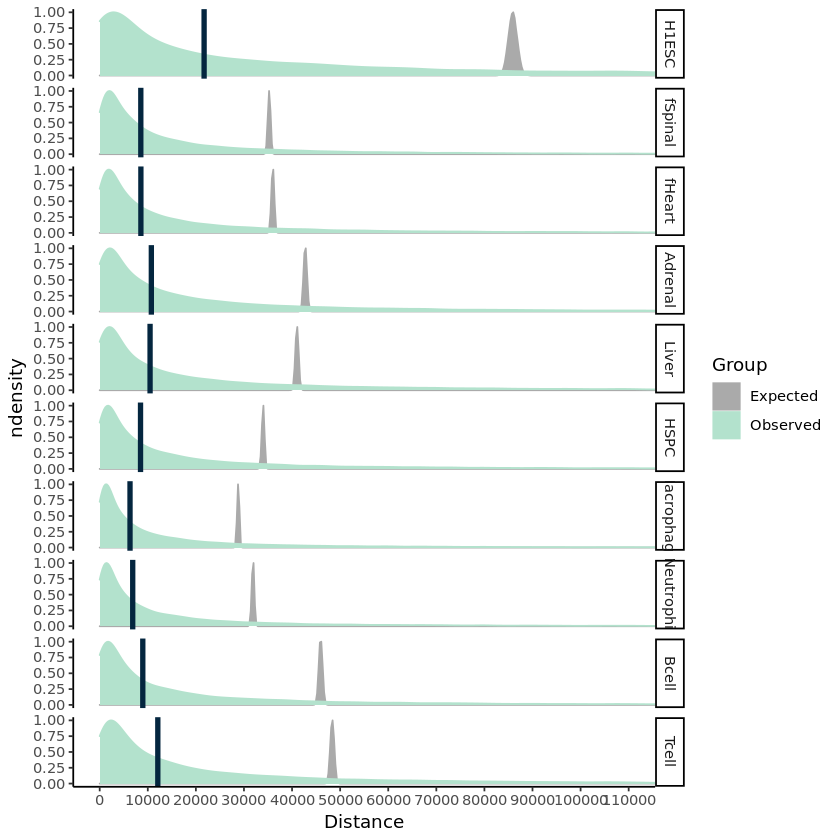

In [35]:
pdf("interHMRDistances.9celltypes.July152023.AllDistUnder150000.pdf")

p15 <- ggplot(AllDistUnder150000, aes(x=Distance, y=..ndensity.., group=Group, fill=Group, color=Group)) +
  geom_density() + 
  facet_grid(factor(Celltype, levels = Celltype_Plotting_Order) ~.) + 
  theme_classic() +
  coord_cartesian(xlim=c(0,110000)) +
  geom_vline(data = med_vals, mapping=aes(xintercept = medianDis), size=1.5, color="#04263f") +
  scale_x_continuous(breaks = seq(0, 130000, by = 10000)) +
  scale_fill_manual( values = c("#AAAAAA","#b3e2cd")) +
  scale_color_manual( values = c("#AAAAAA","#b3e2cd"))
p15

dev.off()
p15

In [39]:
getwd()

[1] "/gpfs52/data/hodges_lab/Tim/finalAnalyses_HMRs/interHMRdistances"

png 
  2

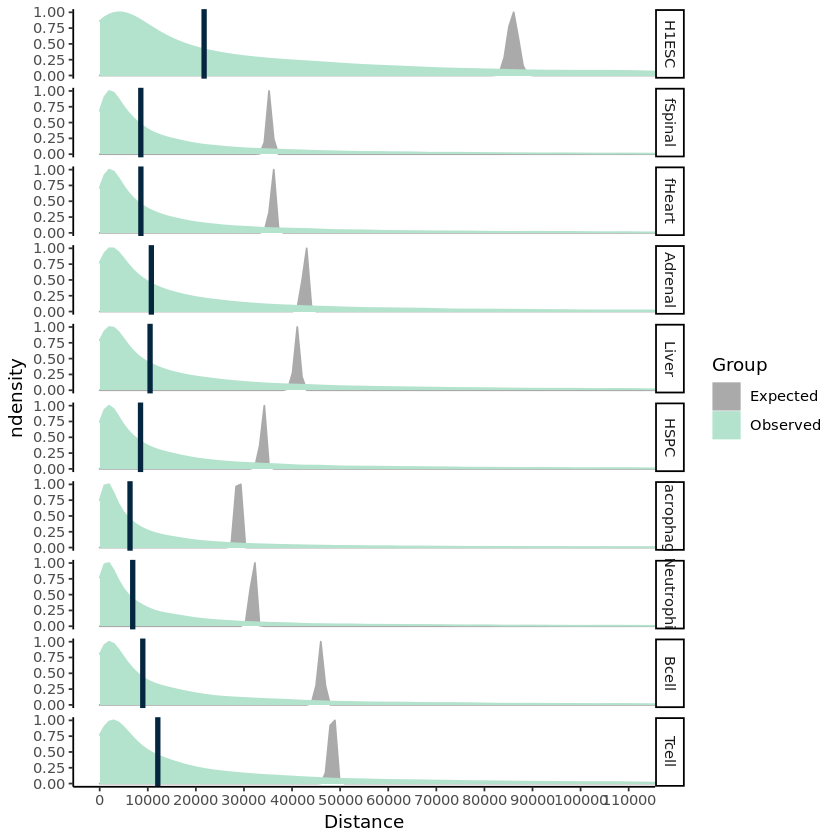

In [36]:
pdf("interHMRDistances.9celltypes.July15.AllDistUnder500000.pdf")

p50 <- ggplot(AllDistUnder500000, aes(x=Distance, y=..ndensity.., group=Group, fill=Group, color=Group)) +
  geom_density() + 
  facet_grid(factor(Celltype, levels = Celltype_Plotting_Order) ~.) + 
  theme_classic() +
  coord_cartesian(xlim=c(0,110000)) +
  geom_vline(data = med_vals, mapping=aes(xintercept = medianDis), size=1.5, color="#04263f") +
  scale_x_continuous(breaks = seq(0, 130000, by = 10000)) +
  scale_fill_manual( values = c("#AAAAAA","#b3e2cd")) +
  scale_color_manual( values = c("#AAAAAA","#b3e2cd"))
p50

dev.off()

p50

## Stats for Table S2 with all cell types (9)

In [9]:
print("H1ESC")
quantile(((AllObsDist %>% filter(Celltype=="H1ESC" &
                                   Distance < 50000))$Distance),
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))

print("fSpinal")
quantile(((AllObsDist %>% filter(Celltype=="fSpinal" &
                                   Distance < 50000))$Distance),
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))

print("fHeart")
quantile(((AllObsDist %>% filter(Celltype=="fHeart" &
                                   Distance < 50000))$Distance),
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))

print("Adrenal")
quantile(((AllObsDist %>% filter(Celltype=="Adrenal" &
                                          Distance < 50000))$Distance),
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))

print("Liver")
quantile(((AllObsDist %>% filter(Celltype=="Liver" &
                                   Distance < 50000))$Distance),
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))

print("HSPC")
quantile(((AllObsDist %>% filter(Celltype=="HSPC" &
                                   Distance < 50000))$Distance),
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))

print("Macrophage")
quantile(((AllObsDist %>% filter(Celltype=="Macrophage" &
                                   Distance < 50000))$Distance),
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))

print("Tcell")
quantile(((AllObsDist %>% filter(Celltype=="Tcell" &
                                   Distance < 50000))$Distance),
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))

print("Bcell")
quantile(((AllObsDist %>% filter(Celltype=="Bcell" &
                                   Distance < 50000))$Distance),
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))



[1] "H1ESC"


10%      20%      30%      40%      45%      50%      55%      60% 
  227.00  1283.00  2953.80  5626.60  7102.65  8921.00 11013.15 13299.80 
     70%      80%      90% 
18970.00 26779.00 37041.20

[1] "fSpinal"


10%   20%   30%   40%   45%   50%   55%   60%   70%   80%   90% 
  881  1770  2960  4574  5485  6555  7805  9237 13267 19213 29618

[1] "fHeart"


10%   20%   30%   40%   45%   50%   55%   60%   70%   80%   90% 
  761  1626  2787  4329  5309  6361  7689  9183 13231 19414 29903

[1] "Adrenal"


10%     20%     30%     40%     45%     50%     55%     60%     70%     80% 
  673.0  1678.0  2969.0  4777.0  5990.0  7311.0  8799.3 10524.0 15105.6 21739.2 
    90% 
32016.2

[1] "Liver"


10%     20%     30%     40%     45%     50%     55%     60%     70%     80% 
  633.0  1508.0  2716.8  4441.4  5540.0  6846.0  8461.0 10148.2 14803.0 21582.0 
    90% 
31880.6

[1] "HSPC"


10%      20%      30%      40%      45%      50%      55%      60% 
  652.00  1469.00  2618.00  4222.40  5205.00  6330.00  7668.15  9208.00 
     70%      80%      90% 
13361.00 19384.00 29702.00

[1] "Macrophage"


10%      20%      30%      40%      45%      50%      55%      60% 
  535.90  1152.80  2025.70  3284.00  4078.55  5001.00  6080.45  7375.00 
     70%      80%      90% 
10919.00 16430.20 26317.30

[1] "Tcell"


10%     20%     30%     40%     45%     50%     55%     60%     70%     80% 
  715.0  1789.0  3329.4  5214.0  6397.3  7728.0  9361.0 11244.8 15820.8 22468.6 
    90% 
32882.2

[1] "Bcell"


10%     20%     30%     40%     45%     50%     55%     60%     70%     80% 
  436.3  1259.0  2410.0  4030.0  4998.0  6142.0  7474.0  9112.8 13573.1 19841.2 
    90% 
30592.7

In [47]:
print("H1ESC")
quantile(((AllObsDist %>% filter(Celltype=="H1ESC" &
                                   Distance < 50000))$Distance),
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))


[1] "H1ESC"


10%      20%      30%      40%      45%      50%      55%      60% 
  227.00  1283.00  2953.80  5626.60  7102.65  8921.00 11013.15 13299.80 
     70%      80%      90% 
18970.00 26779.00 37041.20

In [43]:
print("H1ESC")
quantile(((AllObsDist %>% filter(Celltype=="H1ESC" &
                                   Distance < 50000))$Distance),
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))

print("fSpinal")
quantile(((AllObsDist %>% filter(Celltype=="fSpinal" &
                                   Distance < 50000))$Distance),
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))

print("fHeart")
quantile(((AllObsDist %>% filter(Celltype=="fHeart" &
                                   Distance < 50000))$Distance),
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))

print("Adrenal")
quantile(((AllObsDist %>% filter(Celltype=="Adrenal" &
                                          Distance < 50000))$Distance),
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))

print("Liver")
quantile(((AllObsDist %>% filter(Celltype=="Liver" &
                                   Distance < 50000))$Distance),
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))

print("HSPC")
quantile(((AllObsDist %>% filter(Celltype=="HSPC" &
                                   Distance < 50000))$Distance),
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))

print("Macrophage")
quantile(((AllObsDist %>% filter(Celltype=="Macrophage" &
                                   Distance < 50000))$Distance),
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))

print("Neutrophil")
quantile(((AllObsDist %>% filter(Celltype=="Neutrophil" &
                                   Distance < 50000))$Distance),
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))


print("Tcell")
quantile(((AllObsDist %>% filter(Celltype=="Tcell" &
                                   Distance < 50000))$Distance),
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))

print("Bcell")
quantile(((AllObsDist %>% filter(Celltype=="Bcell" &
                                   Distance < 50000))$Distance),
         c(.1,.2,.3,.4,.45,.5,.55,.6,.7,.8,.9))



[1] "H1ESC"


10%      20%      30%      40%      45%      50%      55%      60% 
  227.00  1283.00  2953.80  5626.60  7102.65  8921.00 11013.15 13299.80 
     70%      80%      90% 
18970.00 26779.00 37041.20

[1] "fSpinal"


10%   20%   30%   40%   45%   50%   55%   60%   70%   80%   90% 
  881  1770  2960  4574  5485  6555  7805  9237 13267 19213 29618

[1] "fHeart"


10%   20%   30%   40%   45%   50%   55%   60%   70%   80%   90% 
  761  1626  2787  4329  5309  6361  7689  9183 13231 19414 29903

[1] "Adrenal"


10%     20%     30%     40%     45%     50%     55%     60%     70%     80% 
  673.0  1678.0  2969.0  4777.0  5990.0  7311.0  8799.3 10524.0 15105.6 21739.2 
    90% 
32016.2

[1] "Liver"


10%     20%     30%     40%     45%     50%     55%     60%     70%     80% 
  633.0  1508.0  2716.8  4441.4  5540.0  6846.0  8461.0 10148.2 14803.0 21582.0 
    90% 
31880.6

[1] "HSPC"


10%      20%      30%      40%      45%      50%      55%      60% 
  652.00  1469.00  2618.00  4222.40  5205.00  6330.00  7668.15  9208.00 
     70%      80%      90% 
13361.00 19384.00 29702.00

[1] "Macrophage"


10%      20%      30%      40%      45%      50%      55%      60% 
  535.90  1152.80  2025.70  3284.00  4078.55  5001.00  6080.45  7375.00 
     70%      80%      90% 
10919.00 16430.20 26317.30

[1] "Neutrophil"


10%      20%      30%      40%      45%      50%      55%      60% 
  523.00  1190.00  2123.00  3472.00  4298.00  5265.00  6409.95  7824.40 
     70%      80%      90% 
11583.00 17323.00 27366.00

[1] "Tcell"


10%     20%     30%     40%     45%     50%     55%     60%     70%     80% 
  715.0  1789.0  3329.4  5214.0  6397.3  7728.0  9361.0 11244.8 15820.8 22468.6 
    90% 
32882.2

[1] "Bcell"


10%     20%     30%     40%     45%     50%     55%     60%     70%     80% 
  436.3  1259.0  2410.0  4030.0  4998.0  6142.0  7474.0  9112.8 13573.1 19841.2 
    90% 
30592.7

In [45]:
AllObsDistUnder50000

Distance,Celltype,Group
<dbl>,<fct>,<chr>
42841,Adrenal,Observed
510,Adrenal,Observed
288,Adrenal,Observed
153,Adrenal,Observed
151,Adrenal,Observed
135,Adrenal,Observed
135,Adrenal,Observed
36539,Adrenal,Observed
7262,Adrenal,Observed


In [41]:
AllObsDistUnder50000$Celltype <- factor(AllObsDistUnder50000$Celltype, levels=c("H1ESC","fSpinal","fHeart","Adrenal","Liver","HSPC","Macrophage","Neutrophil","Tcell","Bcell"))

In [48]:
AllObsDistUnder50000 %>% group_by(Celltype) %>% summarize(
    q1 = quantile(Distance, c(.1)),
    q2 = quantile(Distance, c(.2)),
    q3 = quantile(Distance, c(.3)),
    q4 = quantile(Distance, c(.4)),
    q45 = quantile(Distance, c(.45)),
    q5 = quantile(Distance, c(.5)),
    q55 = quantile(Distance, c(.55)),
    q6 = quantile(Distance, c(.6)),
    q7 = quantile(Distance, c(.7)),
    q8 = quantile(Distance, c(.8)),
    q9 = quantile(Distance, c(.9)),
) %>% t()

Celltype,H1ESC,fSpinal,fHeart,Adrenal,Liver,HSPC,Macrophage,Neutrophil,Tcell,Bcell
q1,227.0,881.0,761.0,673.0,633.0,652.0,535.9,523.0,715.0,436.0
q2,1283.0,1770.0,1626.0,1678.0,1508.0,1469.0,1152.8,1190.0,1789.0,1259.0
q3,2953.8,2960.0,2787.0,2969.0,2716.9,2618.0,2025.7,2123.0,3329.0,2410.0
q4,5626.6,4574.0,4329.0,4777.0,4441.2,4222.0,3284.0,3472.0,5214.0,4030.0
q45,7102.65,5485.00,5309.00,5990.00,5540.00,5205.00,4078.55,4298.00,6397.05,4998.00
q5,8921,6555,6361,7311,6846,6330,5001,5265,7728,6142
q55,11013.15,7805.00,7689.00,8799.15,8461.00,7668.00,6080.45,6409.95,9361.00,7474.00
q6,13299.8,9237.0,9183.0,10524.0,10148.6,9208.0,7375.0,7824.4,11244.8,9113.0
q7,18970.0,13267.0,13231.0,15104.8,14802.5,13361.0,10919.0,11583.0,15821.0,13573.0
q8,26779.0,19213.0,19414.0,21740.0,21582.0,19384.0,16430.2,17323.0,22468.6,19841.8


In [37]:
mean(AllObsDistUnder50000$Distance)

[1] 11186.09

In [36]:
median(AllObsDistUnder50000$Distance)

[1] 6438

In [42]:
AllObsDistUnder50000_6 <- AllObsDistUnder50000 %>% filter(Celltype %in% c("HSPC","Macrophage","Tcell")) 
AllObsDistUnder50000_6 %>% select(Distance) %>% unlist() %>% mean()
AllObsDistUnder50000_6 %>% select(Distance) %>% unlist() %>% median()

[1] 10665.99

[1] 6007

In [27]:
mean(AllObsDist$Distance)

[1] 31866.03

In [28]:
median(AllObsDist$Distance)

[1] 9182

In [39]:
AllObsDist_6 <- AllObsDist %>% filter(Celltype %in% c("HSPC","Macrophage","Tcell")) 

In [40]:
AllObsDist_6 %>% select(Distance) %>% unlist() %>% mean()

[1] 27807.43

In [41]:
AllObsDist_6 %>% select(Distance) %>% unlist() %>% median()

[1] 8175

In [35]:
AllObsDist %>% filter(Distance < 50000) %>% summarize(
    q1 = quantile(Distance, c(.1)),
    q2 = quantile(Distance, c(.2)),
    q3 = quantile(Distance, c(.3)),
    q4 = quantile(Distance, c(.4)),
    q45 = quantile(Distance, c(.45)),
    q5 = quantile(Distance, c(.5)),
    q55 = quantile(Distance, c(.55)),
    q6 = quantile(Distance, c(.6)),
    q7 = quantile(Distance, c(.7)),
    q8 = quantile(Distance, c(.8)),
    q9 = quantile(Distance, c(.9)),
) %>% t()

q1,631.0
q2,1485.0
q3,2651.0
q4,4276.0
q45,5287.0
q5,6438.0
q55,7809.0
q6,9402.0
q7,13701.0
q8,19995.0
q9,30537.2
